In [2]:
pip install pandas numpy matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


Import the libraries

In [120]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from itertools import product

Load the data

In [121]:
data = pd.read_csv('train.csv')

Explore the data

In [122]:
data.columns

Index(['productID', 'model', 'color', 'gpu', 'cpu', 'ram', 'harddisk', 'OS',
       'special_features', 'price'],
      dtype='object')

In [123]:
data.head()

,productID,model,color,gpu,cpu,ram,harddisk,OS,special_features,price
0,0,Dell Dell Latitude 14 Inches,NaN,"Integrated, NVIDIA GeForce GT 720M",Core i5 / 1.7 GHz,4 GB,500 GB,Windows 8,NaN,180.00
1,1,ASUS ASUS CHROMEBOOK CX9 14 INCHES,STAR BLACK,INTEGRATED,INTEL CORE I7,16 GB,512 GB,CHROME OS,STYLUS,1211.99
2,2,Dell Inspiron 3511 Laptop 15.6 Inches,Black,Integrated,Core i5,32 GB,2000 GB,Windows 10 Home,Wifi & Bluetooth,735.59
3,3,hp 14 Inches,NaN,Unknown,3.7 GHz,4 GB,NaN,Windows 10 Home,Anti-glare,339.00
4,4,Dell Alienware X14 Laptop 14 Inches,Lunar Light,"Integrated, NVIDIA GeForce RTX 3060",Core i7,12 GB,1000 GB,Windows 11 Home,NaN,2086.99


Check data types, missing values, and descriptive statistics

In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2943 entries, 0 to 2942
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   productID         2943 non-null   int64  
 1   model             2943 non-null   object 
 2   color             2311 non-null   object 
 3   gpu               2943 non-null   object 
 4   cpu               2943 non-null   object 
 5   ram               2878 non-null   object 
 6   harddisk          2741 non-null   object 
 7   OS                2911 non-null   object 
 8   special_features  1946 non-null   object 
 9   price             2943 non-null   float64
dtypes: float64(1), int64(1), object(8)
memory usage: 230.1+ KB


In [125]:
data.describe()

,productID,price
count,2943.000000,2943.000000
mean,1471.000000,1387.568634
std,849.715246,926.904366
min,0.000000,3.790000
25%,735.500000,740.985000
50%,1471.000000,1194.770000
75%,2206.500000,1819.990000
max,2942.000000,11261.240000


In [126]:
data.isnull().sum()

productID             0
model                 0
color               632
gpu                   0
cpu                   0
ram                  65
harddisk            202
OS                   32
special_features    997
price                 0
dtype: int64

<b>Key finding </b> <br>
1. there're missing values on color, ram, hardisk, os and special_features

In [127]:
# Remove Duplicates
data.drop_duplicates(inplace=True)

# Idea

Model คอม
- แยกแบรนด์ แยกรุ่น แยก screen size

Color
- อาจจะไม่มีผลต่อราคา

GPU
- แยกประเภท (Integrated, Dedicated, ...) แยกแบรนด์ แยกรุ่น

CPU
- รุ่น
- หน่วยของ CPU เฉพาะ Intel

RAM
- น่าจะแปลงเป็น GB ให้เหมือนกัน

HDD
- น่าจะแปลงเป็น GB ให้เหมือนกัน

OS
- อาจจะแยก

Special Features
- แบ่งย่อยๆจากใน column โดยใช้ & และ ,

In [128]:
computer_brands = [
    'Lenovo',
    'Acer',
    'Dell',
    'ASUS',
    'Samsung',
    'HP',
    'Apple',
    'LG',
    'Toughbook'
]

In [129]:
def extract_brand(model):
    for brand in computer_brands:
        if brand.lower() in model.lower():
            return brand
    return None

data['brand'] = data['model'].apply(extract_brand)
data['brand'] = data['brand'].str.title()
data['brand'] = data['brand'].fillna('Other')

In [130]:
print(data['brand'].value_counts())

brand
Dell         1677
Lenovo        359
Hp            295
Other         193
Asus          182
Acer          125
Lg             43
Apple          28
Samsung        25
Toughbook      16
Name: count, dtype: int64


In [131]:
def remove_brand_from_model(model):
    for brand in computer_brands:
        model = re.sub(brand, '', model, flags=re.IGNORECASE)
    return model.strip()

data['model'] = data['model'].apply(remove_brand_from_model)
data['model'] = data['model'].str.title()

In [132]:
def extract_screen_size(model):
    match = re.search(r'(\d+(\.\d+)?)\s*Inches', model, re.IGNORECASE)
    if match:
        return float(match.group(1))
    return None

data['screen_size'] = data['model'].apply(extract_screen_size)

In [133]:
print(data['screen_size'].value_counts())

screen_size
15.60    1140
14.00     732
16.00     246
13.30     206
17.30     159
17.00      92
11.60      86
13.40      49
18.00      45
13.00      37
15.00      24
13.50      12
14.10      10
12.50       9
13.10       8
16.10       7
12.00       7
10.10       7
16.20       5
13.90       5
14.50       4
13.60       4
15.40       3
12.30       3
12.45       2
11.00       2
22.00       1
10.00       1
12.20       1
27.00       1
10.50       1
14.40       1
12.40       1
15.66       1
Name: count, dtype: int64


In [134]:
def remove_screen_size(model):
    return re.sub(r'\d+(\.\d+)?\s*Inches', '', model, flags=re.IGNORECASE).strip()

data['model'] = data['model'].apply(remove_screen_size)


In [135]:
data['model'].fillna('Unknown', inplace=True)
data['model'] = data['model'].str.title()

/tmp/ipykernel_12292/147240693.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['model'].fillna('Unknown', inplace=True)


In [136]:
print(data['model'].value_counts())

model
                         141
Inspiron 3511 Laptop     100
Latitude 5520 Laptop      96
Latitude                  84
Latitude 3520 Laptop      63
                        ... 
Flex 5                     1
20Gb000Lus                 1
15-Dy100                   1
Xammue One Netbook T1      1
Latitude E7440             1
Name: count, Length: 997, dtype: int64


In [137]:
# Step 2: Color
data['color'] = data['color'].fillna('Unknown')
data['color'] = data['color'].str.title()


In [138]:
print(data['color'].value_counts())

color
Black                                1059
Unknown                               632
Silver                                348
Platinum Silver                       140
Gray                                   96
                                     ... 
Classic Black                           1
Beige Mousse                            1
Neptune Blue                            1
Eclipse Grey                            1
Black With Illuminated Razer Logo       1
Name: count, Length: 170, dtype: int64


In [139]:
def determine_and_clean_gpu(gpu):
    if 'integrated' in gpu.lower():
        gpu_type = 'Integrated'
        cleaned_gpu = re.sub(r'integrated', '', gpu, flags=re.IGNORECASE).strip()
    elif 'dedicated' in gpu.lower():
        gpu_type = 'Dedicated'
        cleaned_gpu = re.sub(r'dedicated', '', gpu, flags=re.IGNORECASE).strip()
    elif gpu:  # If GPU model is available but type is not specified
        gpu_type = 'Dedicated'
        cleaned_gpu = gpu.strip()
    else:
        gpu_type = 'Unknown'
        cleaned_gpu = gpu.strip()
    return gpu_type, cleaned_gpu

data[['gpu_type', 'gpu']] = data['gpu'].apply(lambda x: pd.Series(determine_and_clean_gpu(x)))


In [140]:
print(data['gpu_type'].value_counts())

gpu_type
Integrated    1871
Dedicated     1072
Name: count, dtype: int64


In [141]:
data['gpu'] = data['gpu'].str.replace(', ','').str.title()
data['gpu'] = data['gpu'].fillna('Unknown')

In [142]:
print(data['gpu'].value_counts())

gpu
                                         1369
Intel  Graphics                           113
Intel Iris Xe Graphics                     99
Intel Uhd Graphics                         75
Nvidia Geforce Rtx 4070                    59
                                         ... 
Intel Hd Graphics 530                       1
Rtx 3050 Tinvidia Geforce Rtx 3050 Ti       1
Rtx 3070 Ti                                 1
Rtx2050Intel Iris Xe Graphics               1
Rtx 3070Tinvidia Geforce Rtx 3070           1
Name: count, Length: 296, dtype: int64


In [143]:
data['CPU_Model'] = data['cpu'].str.extract(r'(Core i\d)')  # Add more patterns as necessary
data['CPU_Speed'] = data['cpu'].str.extract(r'(\d+\.\d+)').astype(float)  # GHz extraction


In [144]:
print(data['CPU_Model'].value_counts())

CPU_Model
Core i7    645
Core i5    446
Core i9    118
Core i3     56
Name: count, dtype: int64


In [145]:
print(data['CPU_Speed'].value_counts())

CPU_Speed
2.60    32
1.80    28
2.40    27
1.10    25
1.70    18
2.80    14
2.30    13
1.20    13
3.50    13
3.40    12
2.20    10
1.60    10
2.70     9
4.50     9
4.70     8
2.50     7
4.20     7
2.10     7
4.60     6
3.60     6
4.80     6
1.90     6
3.30     5
3.70     5
5.60     4
4.40     4
1.30     4
4.30     3
2.90     3
3.90     3
5.10     2
3.80     2
3.20     2
4.10     2
1.40     1
2.66     1
3.49     1
1.50     1
2.53     1
0.90     1
5.20     1
Name: count, dtype: int64


In [146]:
# Step to clean RAM and Harddisk fields
def convert_to_gb(value):
    if pd.isna(value):
        return None
    value = value.strip()  # Remove any leading or trailing whitespace
    if 'GB' in value:
        return float(value.replace('GB', '').strip())
    elif 'TB' in value:
        return float(value.replace('TB', '').strip()) * 1024  # Convert TB to GB
    elif 'MB' in value:
        return float(value.replace('MB', '').strip()) / 1024  # Convert MB to GB
    else:
        return None  # Handle unexpected formats

# Apply conversion functions
data['ram'] = data['ram'].apply(convert_to_gb)
data['harddisk'] = data['harddisk'].apply(convert_to_gb)

In [147]:
print(data['ram'].value_counts())

ram
16.0000     1132
32.0000      602
8.0000       515
64.0000      273
4.0000       232
12.0000       35
24.0000       22
40.0000       15
48.0000       15
20.0000       12
2.0000         9
6.0000         4
1.0000         4
128.0000       3
96.0000        2
5.0000         1
0.0625         1
31.9900        1
Name: count, dtype: int64


In [148]:
print(data['harddisk'].value_counts())

harddisk
512.00000     798
256.00000     509
1000.00000    369
1024.00000    344
2000.00000    161
2048.00000    134
128.00000     124
64.00000       63
4000.00000     53
32.00000       51
500.00000      37
4096.00000     32
8000.00000     17
320.00000       8
16.00000        7
8192.00000      3
8.00000         3
160.00000       3
6000.00000      3
480.00000       2
240.00000       2
250.00000       2
1152.00000      1
120.00000       1
300.00000       1
3072.00000      1
1536.00000      1
640.00000       1
0.06250         1
1966.08000      1
1256.00000      1
0.50000         1
0.03125         1
65.00000        1
1512.00000      1
Name: count, dtype: int64


In [149]:
data['OS'] = data['OS'].str.title()

In [150]:
def map_os(os):
    if isinstance(os, str):
        if 'windows' in os.lower():
            return 'windows'
        elif 'mac' in os.lower():
            return 'mac'
        else:
            return 'others'
    else:
        return 'others'
    
data['OS'] = data['OS'].apply(map_os)

In [151]:
print(data['OS'].value_counts())

OS
windows    2736
others      178
mac          29
Name: count, dtype: int64


In [152]:
# Assuming data is your DataFrame and is already loaded

# Step 1: Split special features
features_split = data['special_features'].str.split(r'[,&]', expand=True)

# Step 2: Stack the split DataFrame and remove NaNs
stacked_features = features_split.stack().str.strip().dropna()

# Step 3: Create a DataFrame of dummy variables
data_special_features = pd.get_dummies(stacked_features, prefix='', prefix_sep='').groupby(level=0).sum()

# Step 4: Concatenate the new dummy features back to the original DataFrame
data = pd.concat([data, data_special_features], axis=1)

# Check the result
print(data.head())


   productID                 model        color                      gpu  \
0          0              Latitude      Unknown   Nvidia Geforce Gt 720M   
1          1        Chromebook Cx9   Star Black                            
2          2  Inspiron 3511 Laptop        Black                            
3          3                            Unknown                  Unknown   
4          4  Alienware X14 Laptop  Lunar Light  Nvidia Geforce Rtx 3060   

                 cpu   ram  harddisk       OS  special_features    price  ...  \
0  Core i5 / 1.7 GHz   4.0     500.0  windows               NaN   180.00  ...   
1      INTEL CORE I7  16.0     512.0   others            STYLUS  1211.99  ...   
2            Core i5  32.0    2000.0  windows  Wifi & Bluetooth   735.59  ...   
3            3.7 GHz   4.0       NaN  windows        Anti-glare   339.00  ...   
4            Core i7  12.0    1000.0  windows               NaN  2086.99  ...   

  WORK  Water Proof Water Resistant White backlight 84 K

In [153]:

# Clean up and drop original columns if necessary
data.drop(columns=['cpu', 'special_features'], inplace=True)

In [154]:
# Final DataFrame ready for modeling
print(data.head())

   productID                 model        color                      gpu  \
0          0              Latitude      Unknown   Nvidia Geforce Gt 720M   
1          1        Chromebook Cx9   Star Black                            
2          2  Inspiron 3511 Laptop        Black                            
3          3                            Unknown                  Unknown   
4          4  Alienware X14 Laptop  Lunar Light  Nvidia Geforce Rtx 3060   

    ram  harddisk       OS    price brand  screen_size  ... WORK Water Proof  \
0   4.0     500.0  windows   180.00  Dell         14.0  ...  NaN         NaN   
1  16.0     512.0   others  1211.99  Asus         14.0  ...  0.0         0.0   
2  32.0    2000.0  windows   735.59  Dell         15.6  ...  0.0         0.0   
3   4.0       NaN  windows   339.00    Hp         14.0  ...  0.0         0.0   
4  12.0    1000.0  windows  2086.99  Dell         14.0  ...  NaN         NaN   

   Water Resistant  White backlight 84 Key  Wifi  built for en

Handle missing values

In [155]:
data.fillna('Unknown', inplace=True)

/tmp/ipykernel_12292/4205422876.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.fillna('Unknown', inplace=True)


In [156]:
data = data.convert_dtypes()

Feature encoding: Convert categorical variables like model, color, gpu, cpu, OS, etc., into numeric values using one-hot encoding or label encoding.


Normalize or scale continuous variables like ram and harddisk if needed.


In [157]:
print(data['ram'].isnull().sum())  # Check if there are missing values in the 'ram' column
print(data['harddisk'].isnull().sum())  # Check for missing values in 'harddisk'

0
0


Feature Exploration:



Correlation matrix: Identify which features are correlated with the target variable (price).


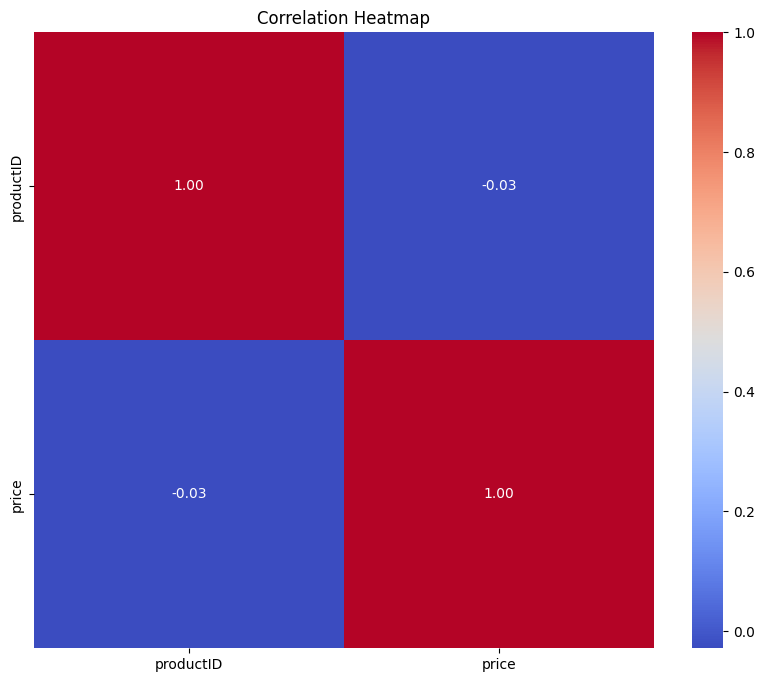

In [158]:
data_sample = data.sample(frac=0.1, random_state=42)

# Step 1: Select only numeric columns for correlation
numeric_cols = data_sample.select_dtypes(include=['float64', 'int64'])

# Step 2: Compute correlation
correlation_matrix = numeric_cols.corr()

# Step 3: Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Distribution of price: Visualize the price distribution and identify outliers.

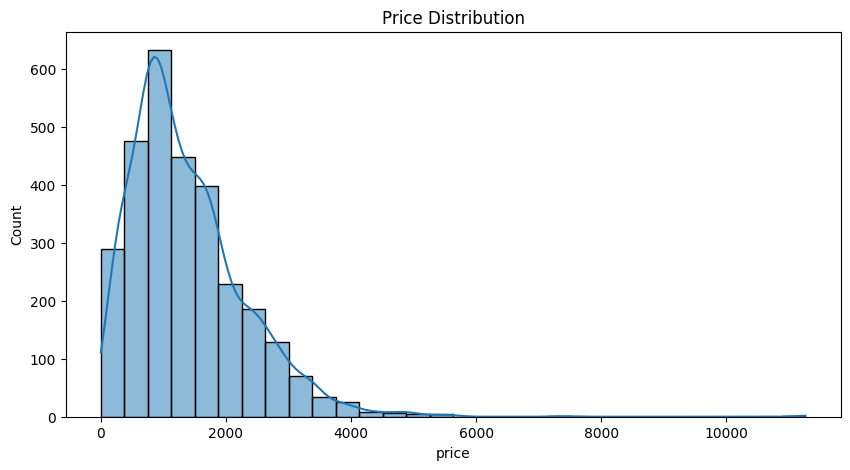

In [159]:
# Histogram
plt.figure(figsize=(10, 5))
sns.histplot(data['price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.show()

Relationship between features and price: Plot the relationship between price and other features like ram, harddisk, etc.


Boxplots: Use boxplots to identify potential outliers in numerical features.

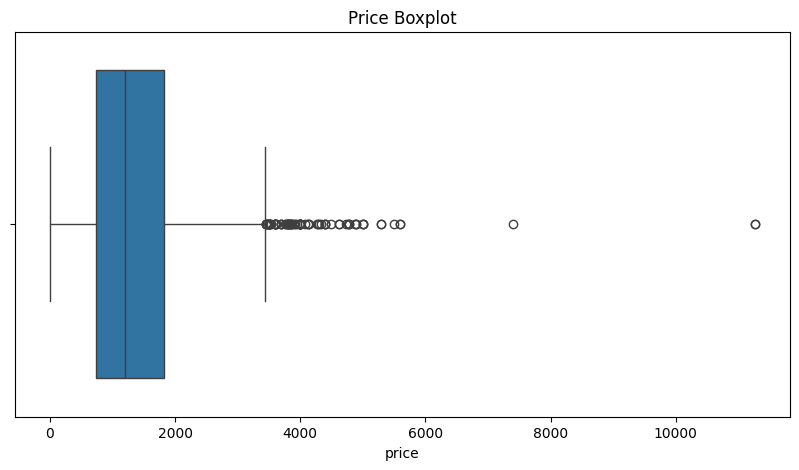

In [161]:
# Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x=data['price'])
plt.title('Price Boxplot')
plt.show()


Saving Data using CSV


In [162]:
data.to_csv('cleaned_data.csv', index=False)